In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM

In [53]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


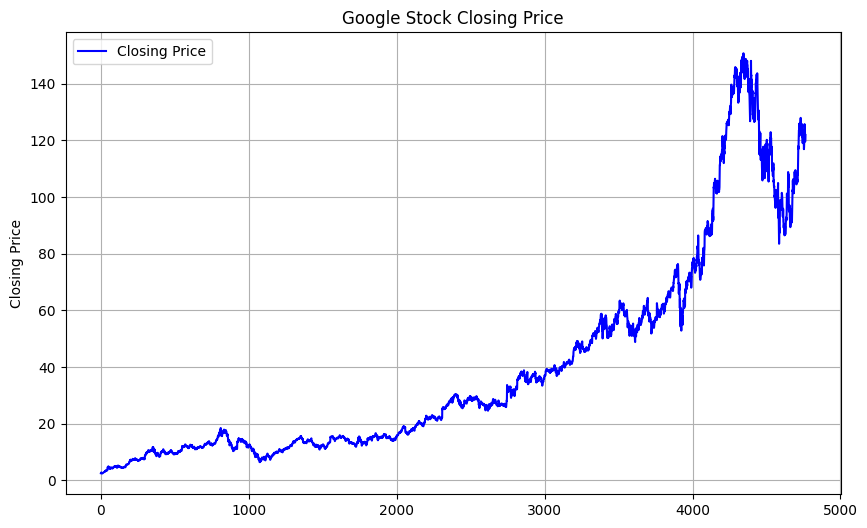

In [54]:
plt.figure(figsize=(10, 6),dpi = 100)
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.ylabel('Closing Price')
plt.title('Google Stock Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
df.set_index('Date', inplace=True)
data = df['Close'].values.reshape(-1, 1)
data

array([[  2.499133],
       [  2.697639],
       [  2.724787],
       ...,
       [119.529999],
       [120.309998],
       [121.879997]])

In [56]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [57]:
sequence_length = 20

X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [58]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 9s 40ms/step - loss: 6.1964e-04 - val_loss: 1.8796e-04
Epoch 2/50
95/95 [==============================] - 2s 26ms/step - loss: 2.5212e-05 - val_loss: 1.3660e-04
Epoch 3/50
95/95 [==============================] - 3s 32ms/step - loss: 2.5080e-05 - val_loss: 1.2187e-04
Epoch 4/50
95/95 [==============================] - 3s 34ms/step - loss: 2.5395e-05 - val_loss: 1.1333e-04
Epoch 5/50
95/95 [==============================] - 2s 26ms/step - loss: 2.5128e-05 - val_loss: 1.1162e-04
Epoch 6/50
95/95 [==============================] - 2s 26ms/step - loss: 2.5984e-05 - val_loss: 1.0548e-04
Epoch 7/50
95/95 [==============================] - 3s 28ms/step - loss: 2.5430e-05 - val_loss: 1.0775e-04
Epoch 8/50
95/95 [==============================] - 4s 41ms/step - loss: 2.2201e-05 - val_loss: 1.1652e-04
Epoch 9/50
95/95 [==============================] - 3s 27ms/step - loss: 2.2982e-05 - val_loss: 9.8429e-05
Epoch 10/50
95/95 [==================

In [61]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

30/30 [==============================] - 1s 9ms/step


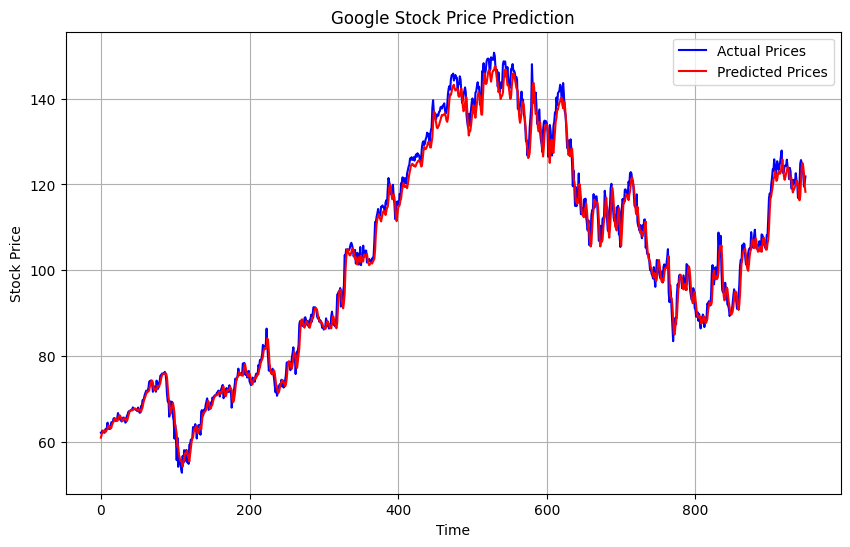

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()